# Question inconsistency

In this notebook, I consider another method for determining questions to remove. I compare the difficulty of the question with the ability of those who answer correctly to determine some measure of question consistency.

In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from scipy.optimize import curve_fit
%matplotlib inline  

In [4]:
# set seed
np.random.seed(1234)

In [5]:
# read data
df = pd.read_csv('astudentData.csv')

In [11]:
# Find % correct for each question
scores = df.groupby('question_id')['correct'].mean() 

In [18]:
scores.head(3).reset_index()

,question_id,correct
0,13,0.673893
1,21,0.693931
2,26,0.692102


Above, we see the score for each question. For example, question {{scores.head().reset_index()['question_id'][0]}} had, of those who responded to it, 67% of the responses correct.

In [6]:
stu_scores = df.groupby('user_id')['correct'].mean().reset_index(name='student_score')
stu_scores_new_index = stu_scores.set_index(stu_scores['user_id'])

# reset index to user_id
df_new_index = df.set_index(df['user_id'])

# Now merge to original df on user_id index
merged = df_new_index.merge(stu_scores_new_index)

In [7]:
merged.head(3)

,question_id,user_id,correct,student_score
0,13,63994,0,0.304
1,27,63994,0,0.304
2,57,63994,1,0.304


We create the merged dataframe, which contains a new column -- the test score for each student on last year's test in each row.

In [20]:
right = merged.loc[merged['correct'] == 1]
right.sort_values(by='question_id').head()

,question_id,user_id,correct,student_score
14624,13,56502,1,0.572917
39148,13,33106,1,0.500000
39258,13,19213,1,0.950000
39278,13,26393,1,0.826087
8554,13,71684,1,0.844262


Above, we just look at only the responses to questions that were right.

In [28]:
aacs = right.groupby('question_id')['student_score'].mean()
aacs.reset_index().head()

,question_id,student_score
0,13,0.725642
1,21,0.698023
2,26,0.704470
3,27,0.744511
4,28,0.671537


Above, group by question and then find the mean of student_score. This is showing the mean test score for all the students who got this question right. For example, those who got question 13 right had an average test score of 73%.  

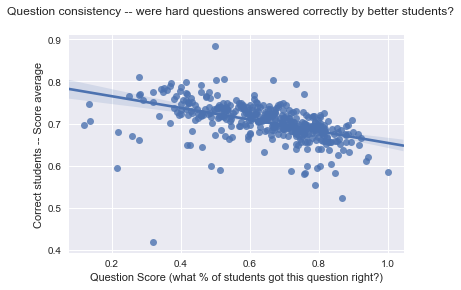

In [22]:
sns.regplot(scores,aacs)
sns.plt.ylabel('Correct students -- Score average')
sns.plt.xlabel('Question Score (what % of students got this question right?)')
sns.plt.suptitle('Question consistency -- were hard questions answered correctly by better students?')
plt.show()

In the chart above, we see the downward trend one would expect. That is, harder questions are answered correctly by only the best students.

There is one rather errant question in the lower left - this question was one that was difficulty (less than 40% of respondents got it right), but was scored well on by students of low ability (~40% score on average). This implies to me that this is a poor question, as its difficulty doesn't seem to be aligned with Astronomics, and is giving results that seem more due to chance, than ability.

As a result, I'll decide to remove this question from this year's exam.

In [30]:
aacs.reset_index().sort_values(by='student_score').head(1)

,question_id,student_score
176,1232,0.417874


Let's make sure we get rid of question id 1232.